In [ ]:
!pip install convokit

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

In [ ]:
dolphin_aita_biber_df = pd.read_csv("dolphin_AmItheAsshole_biber_features.csv", index_col="doc_id")
human_aita_biber_df = pd.read_csv("human_AmItheAsshole_biber_features_10k.csv", index_col="doc_id")

llama_cornell_biber_df = pd.read_csv("llama3-2_Cornell_biber_features.csv", index_col="doc_id")
human_cornell_biber_df = pd.read_csv("human_Cornell_biber_features_10k.csv", index_col="doc_id")


In [ ]:
# dolphin_aita_stylo_df = pd.read_csv("dolphin_AmItheAsshole_features.csv", index_col="utterance_id")
# human_aita_stylo_df = pd.read_csv("human_AmItheAsshole_features.csv", index_col="utterance_id").iloc[:10000]

# llama_cornell_stylo_df = pd.read_csv("llama3-2_Cornell_features.csv", index_col="utterance_id")
# human_cornell_stylo_df = pd.read_csv("human_Cornell_features.csv", index_col="utterance_id").iloc[:10000]


In [ ]:
dolphin_mat = dolphin_aita_biber_df.to_numpy(dtype=np.float32)
human_aita_mat = human_aita_biber_df.to_numpy(dtype=np.float32)
# stylo
# dolphin_aita_stylo_mat = dolphin_aita_stylo_df.apply(zscore).to_numpy(dtype=np.float32)
# human_aita_stylo_mat = human_aita_stylo_df.apply(zscore).to_numpy(dtype=np.float32)

llama_mat = llama_cornell_biber_df.to_numpy(dtype=np.float32)
human_cornell_mat = human_cornell_biber_df.to_numpy(dtype=np.float32)
# # stylo
# llama_cornell_stylo_mat = llama_cornell_stylo_df.apply(zscore).to_numpy(dtype=np.float32)
# human_cornell_stylo_mat = human_cornell_stylo_df.apply(zscore).to_numpy(dtype=np.float32)

In [ ]:
def plot_kPCA_3d(X1, X2, labels, title, colors=['#FFC20A', '#0C7BDC'], kernel='cosine'):
    if len(labels) != 2:
        raise Exception("List of labels should be of size 2")
    kPCA = KernelPCA(n_components=3, kernel=kernel, n_jobs=-1)
    X1_tf =  kPCA.fit_transform(X1)
    X2_tf = kPCA.transform(X2)

    # fig = plt.figure(figsize=(8, 6))
    # sns.scatterplot(x=human_tf[:, 0], y=human_tf[:, 1], label="Human", alpha=0.5)
    # sns.scatterplot(x=dolphin_tf[:, 0], y=dolphin_tf[:, 1], label="Dolphin", alpha=0.5)

    # plt.xlabel('')

    plt.style.use('dark_background')
    fig = plt.figure(figsize=(8,12))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_facecolor('#212121')  # Set the 3D plot background color
    fig.patch.set_facecolor('#212121')  # Set the figure background color

    ax.scatter(X1_tf[:,2], X1_tf[:, 1], X1_tf[:, 0], c=colors[0], alpha=0.6, label=labels[0])
    ax.scatter(X2_tf[:,2], X2_tf[:, 1], X2_tf[:, 0], c=colors[1], alpha=0.6, label=labels[1])
    ax.set_xlabel('PC1', labelpad=10, fontsize=14)
    ax.set_ylabel('PC2', labelpad=10, fontsize=14)
    ax.set_zlabel('PC3', labelpad=10, fontsize=14)
    ax.set_title(title, fontsize=23)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(fontsize=15, facecolor='#595959')
    plt.tight_layout()
    plt.show()


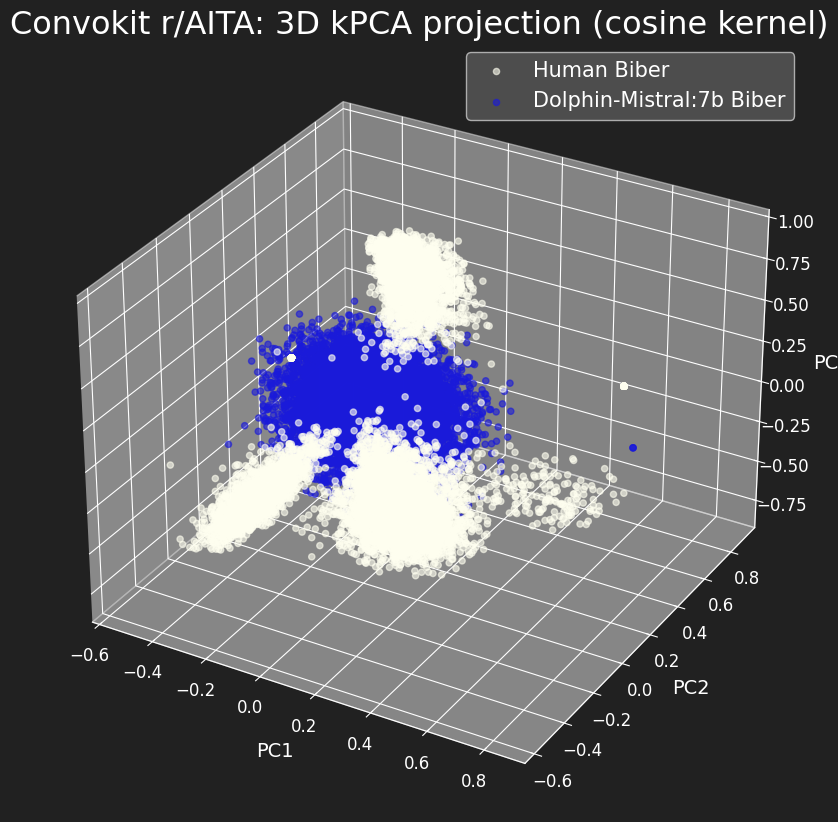

In [ ]:
plot_kPCA_3d(human_aita_mat, dolphin_mat, labels=['Human Biber', 'Dolphin-Mistral:7b Biber'], title='Convokit r/AITA: 3D kPCA projection (cosine kernel)' , colors=['#FFFFF0', '#1A1ADA'])

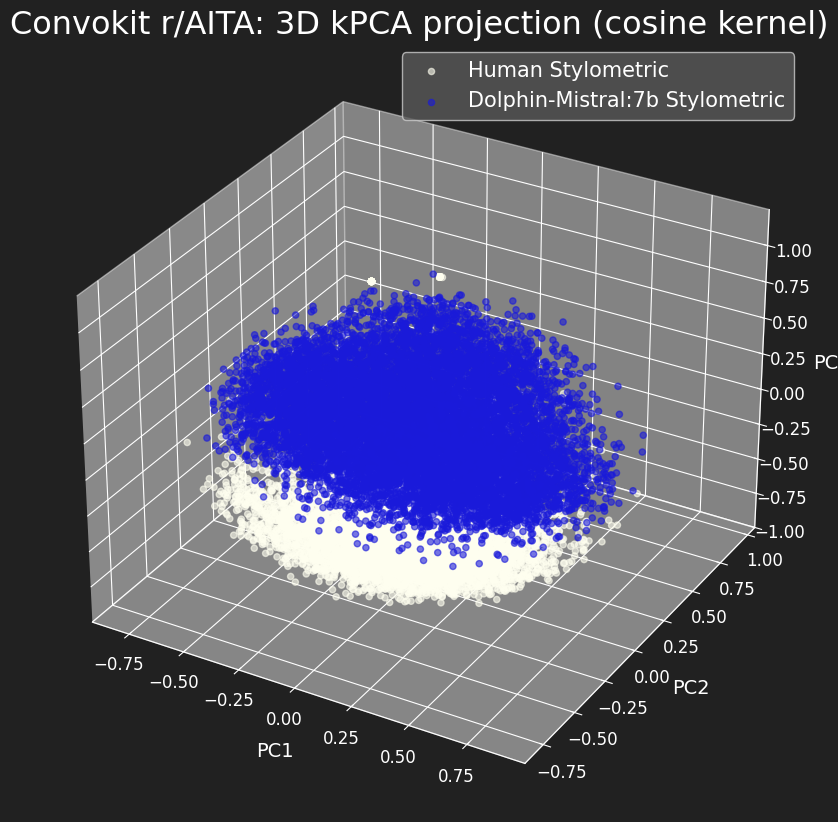

In [ ]:
plot_kPCA_3d(human_aita_stylo_mat, dolphin_aita_stylo_mat, labels=['Human Stylometric', 'Dolphin-Mistral:7b Stylometric'], title='Convokit r/AITA: 3D kPCA projection (cosine kernel)', colors=['#FFFFF0', '#1A1ADA'])

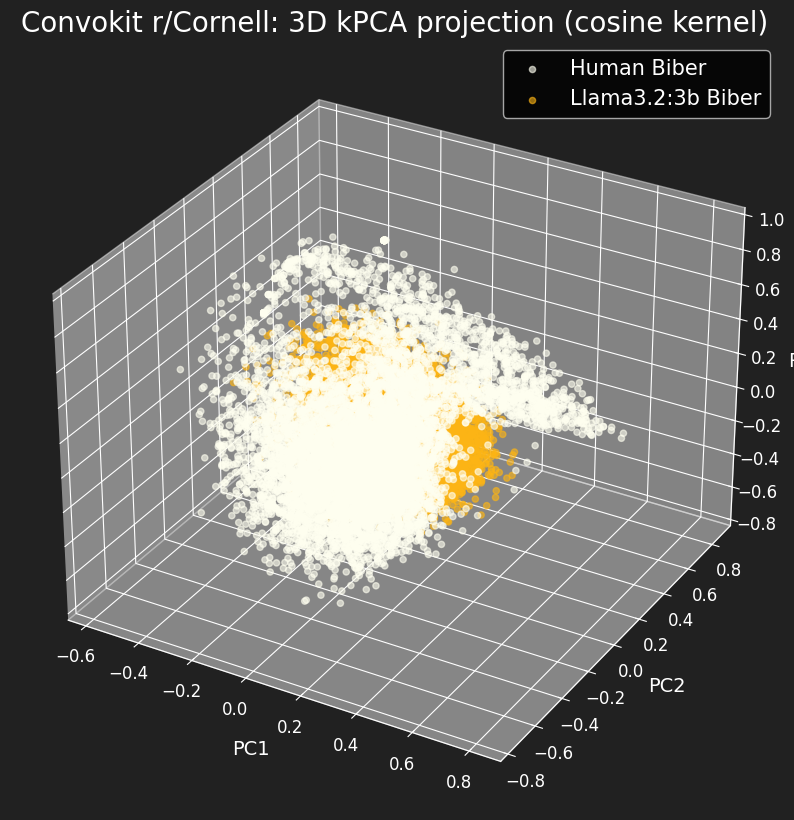

In [ ]:
plot_kPCA_3d(human_cornell_mat, llama_mat, labels=['Human Biber', 'Llama3.2:3b Biber'], title='Convokit r/Cornell: 3D kPCA projection (cosine kernel)', colors=['#FFFFF0', '#FDB515'])

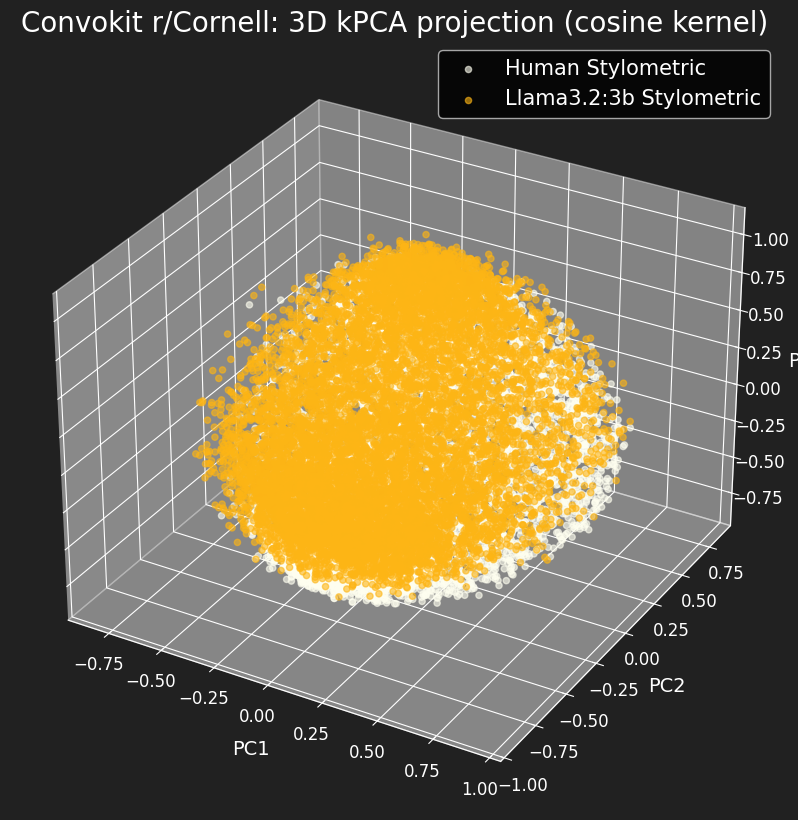

In [ ]:
plot_kPCA_3d(human_cornell_stylo_mat, llama_cornell_stylo_mat, labels=['Human Stylometric', 'Llama3.2:3b Stylometric'], title='Convokit r/Cornell: 3D kPCA projection (cosine kernel)', colors=['#FFFFF0', '#FDB515'])

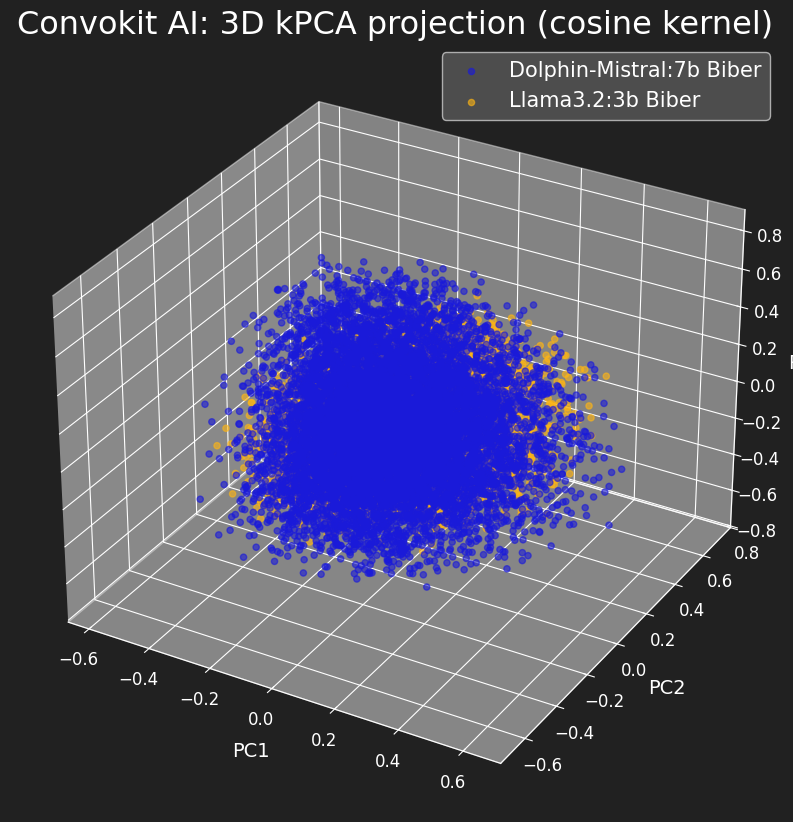

In [ ]:
plot_kPCA_3d(dolphin_mat, llama_mat, labels=['Dolphin-Mistral:7b Biber', 'Llama3.2:3b Biber'], title='Convokit AI: 3D kPCA projection (cosine kernel)', colors=['#1A1ADA', '#FDB515'])

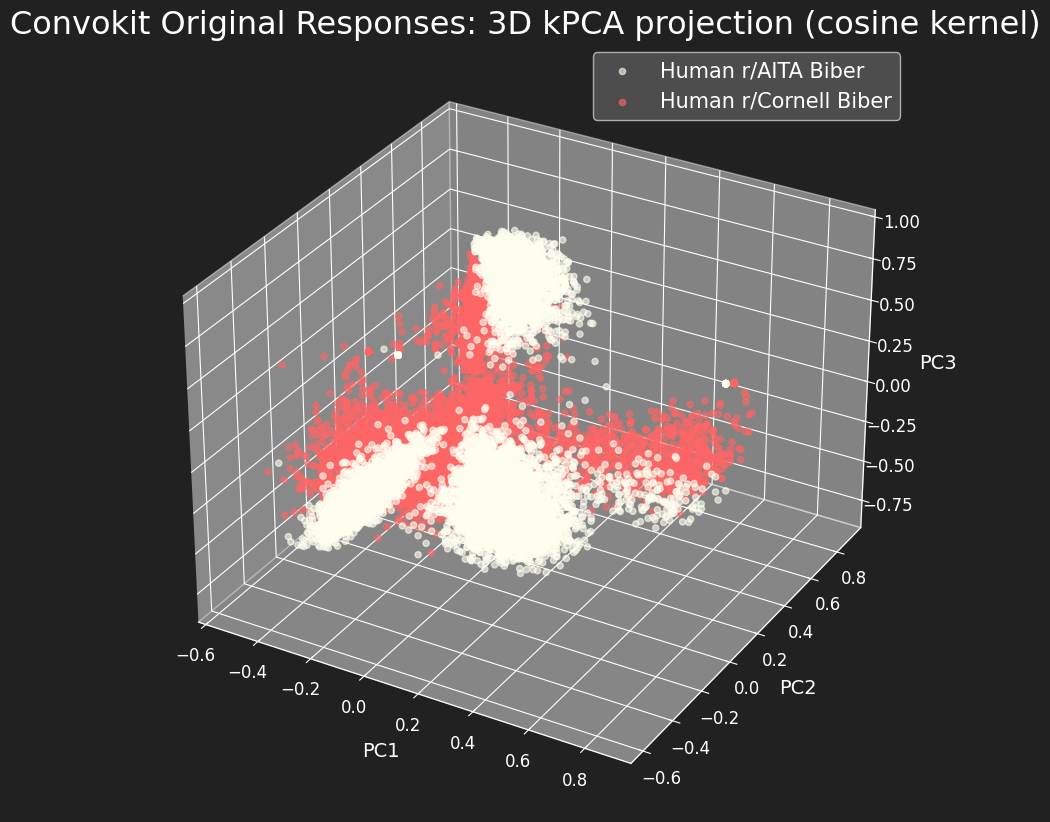

In [ ]:
plot_kPCA_3d(human_aita_mat, human_cornell_mat, labels=['Human r/AITA Biber', 'Human r/Cornell Biber'], title='Convokit Original Responses: 3D kPCA projection (cosine kernel)', colors=['#FFFFF0', '#FF6666'])

In [ ]:
tsne = TSNE(n_components=2, perplexity=30.0, metric="euclidean", n_jobs=-1)
combined = np.vstack([human_aita_mat, dolphin_mat])
transformed = tsne.fit_transform(combined)



In [ ]:
h_labels = np.ones(dtype=np.int16, shape=(human_aita_mat.shape[0], 1))
d_lables = np.zeros(dtype=np.int16, shape=(dolphin_mat.shape[0], 1))
labels = np.vstack([h_labels, d_lables])

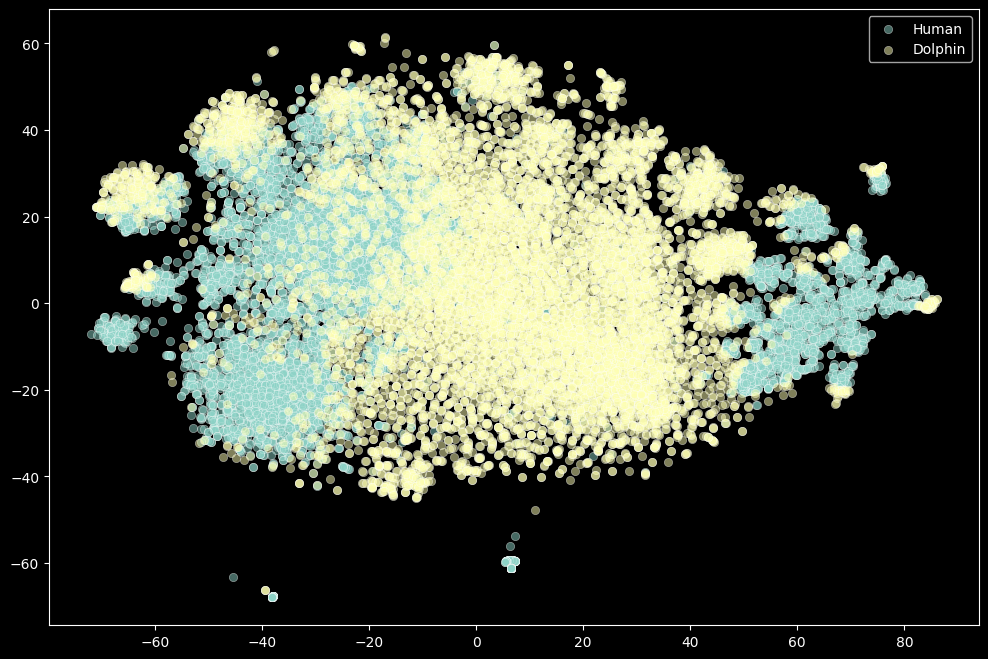

In [ ]:
# TSNE
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(x=transformed[:10000, 0], y=transformed[:10000, 1], label="Human", alpha=0.5)
sns.scatterplot(x=transformed[10000:20000, 0], y=transformed[10000:20000, 1], label="Dolphin", alpha=0.5)
plt.show()